In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
import dataframe_image as dfi
from sklearn.linear_model import LinearRegression

In [2]:
combined = pd.read_csv('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/combined.csv')
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193502 entries, 0 to 193501
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           193502 non-null  int64  
 1   ride_distance        193502 non-null  int64  
 2   ride_duration        193502 non-null  int64  
 3   ride_prime_time      193502 non-null  int64  
 4   total                193502 non-null  float64
 5   leave_month          193502 non-null  int64  
 6   driver_onboard_date  193502 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 10.3 MB


In [3]:
combined.head()

,Unnamed: 0,ride_distance,ride_duration,ride_prime_time,total,leave_month,driver_onboard_date
0,0,1811,327,50,1.872929,3,1.0
1,1,3362,809,0,1.823748,3,1.0
2,2,3282,572,0,1.638515,3,1.0
3,3,65283,3338,25,15.659760,3,1.0
4,4,4115,823,100,3.883260,3,1.0


In [4]:
combined.drop('Unnamed: 0', axis=1, inplace=True)
combined.head()

,ride_distance,ride_duration,ride_prime_time,total,leave_month,driver_onboard_date
0,1811,327,50,1.872929,3,1.0
1,3362,809,0,1.823748,3,1.0
2,3282,572,0,1.638515,3,1.0
3,65283,3338,25,15.659760,3,1.0
4,4115,823,100,3.883260,3,1.0


In [5]:
combined['leave_month'].unique()

array([3, 2, 1, 0])

In [11]:
# total as output var, find out the factor that affect lifetime value
x_ltv = combined[['ride_distance', 'ride_duration', 'ride_prime_time', 'leave_month', 'driver_onboard_date']]
y_ltv = combined['total']

In [12]:
x_ltv_train, x_ltv_test, y_ltv_train, y_ltv_test = train_test_split(x_ltv, y_ltv, test_size=0.2, shuffle=True, random_state=42)

In [13]:
y_ltv_train = y_ltv_train.values.ravel() # Return a contiguous flattened array
y_ltv_test = y_ltv_test.values.ravel()
print(y_ltv_train.shape)
print(y_ltv_test.shape)
print(x_ltv_train.shape)
print(x_ltv_test.shape)

(154801,)
(38701,)
(154801, 5)
(38701, 5)


In [16]:
# feature selection using regression method
fs_ltv = SelectKBest(score_func=f_regression, k='all')
x_ltv_selected = fs_ltv.fit_transform(x_ltv, y_ltv)
scores_ltv = fs_ltv.scores_
features_ltv = x_ltv.columns
score_df_ltv = pd.DataFrame({'features': features_ltv, 'score': scores_ltv})
score_df_ltv

,features,score
0,ride_distance,665446.682397
1,ride_duration,379903.181438
2,ride_prime_time,23446.939912
3,leave_month,44.409173
4,driver_onboard_date,46.512304


In [20]:
# dfi.export(score_df_ltv, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/feature_ltv.png')

In [24]:
# leave_month as output var, find out the factor that lead to churn rate
x = combined[['ride_distance', 'ride_duration', 'ride_prime_time', 'total', 'driver_onboard_date']]
y = combined['leave_month']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
# Data was splitted as 80% train data and 20% test data.

In [26]:
# y_train = y_train.values.reshape(-1, 1)
# y_test = y_test.values.reshape(-1, 1)
y_train = y_train.values.ravel() # Return a contiguous flattened array
y_test = y_test.values.ravel()
print(y_train.shape)
print(y_test.shape)
print(x_train.shape)
print(x_test.shape)

(154801,)
(38701,)
(154801, 5)
(38701, 5)


In [27]:
# feature selection
fs = SelectKBest(score_func=f_classif, k='all')
x_selected = fs.fit_transform(x, y)
scores = fs.scores_
features = x.columns
score_df = pd.DataFrame({'features': features, 'score': scores})
score_df

,features,score
0,ride_distance,11.801586
1,ride_duration,7.992708
2,ride_prime_time,19.915761
3,total,17.996697
4,driver_onboard_date,1247.879805


In [28]:
cor = combined.corr(method='pearson')
cormat = cor.style.background_gradient(cmap='coolwarm').format(precision=2)
cormat

,ride_distance,ride_duration,ride_prime_time,total,leave_month,driver_onboard_date
ride_distance,1.00,0.79,-0.05,0.88,0.01,0.00
ride_duration,0.79,1.00,0.01,0.81,0.01,0.01
ride_prime_time,-0.05,0.01,1.00,0.33,0.02,0.03
total,0.88,0.81,0.33,1.00,0.02,0.02
leave_month,0.01,0.01,0.02,0.02,1.00,0.13
driver_onboard_date,0.00,0.01,0.03,0.02,0.13,1.00


In [23]:
# dfi.export(cormat, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/cormat_ltv.png')

## model for lifetime value

In [37]:
# try feature scaling
sc = StandardScaler()
x_ltv_train = sc.fit_transform(x_ltv_train)
x_ltv_test = sc.fit_transform(x_ltv_test)

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(x_ltv_train, y_ltv_train)
importance = lr.coef_
importance

array([ 1.37596984e+00,  5.31051156e-01,  7.24422009e-01, -1.26287352e-03,
        1.08649488e-03])

In [44]:
result = pd.DataFrame({'variables':x_ltv.columns, 'importance':importance})
result.sort_values('importance', ascending=False, inplace=True)
result

,variables,importance
0,ride_distance,1.375970
2,ride_prime_time,0.724422
1,ride_duration,0.531051
4,driver_onboard_date,0.001086
3,leave_month,-0.001263


## model for churn rate

In [45]:
# try feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [46]:
#To store results of models, we create two dictionaries
result_dict_train = {}
result_dict_test = {}

In [47]:
# logistic regression
reg = LogisticRegression(random_state = 42, multi_class='ovr') # muti_class is for softmax when it's not a binary outcome
accuracies = cross_val_score(reg, x_train, y_train, cv=5)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(x_test,y_test))

Train Score: 0.9992183518867238
Test Score: 0.9990439523526524


<Axes: ylabel='Feature'>

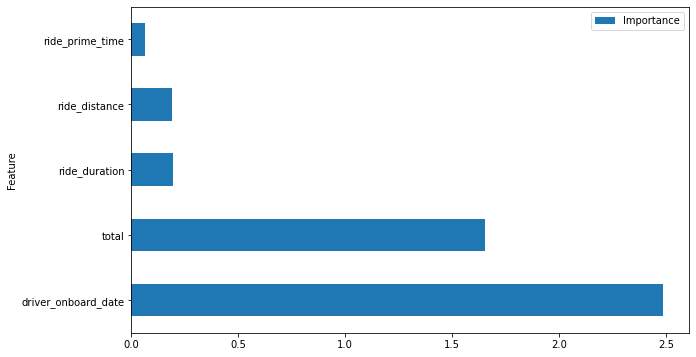

In [50]:
# use coefficience to find out the feature importance of each variable
coef = reg.coef_
avg_importance = np.mean(np.abs(coef), axis=0)
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [51]:
feature_importance

,Feature,Importance
4,driver_onboard_date,2.483562
3,total,1.652009
1,ride_duration,0.196525
0,ride_distance,0.189171
2,ride_prime_time,0.064928


Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

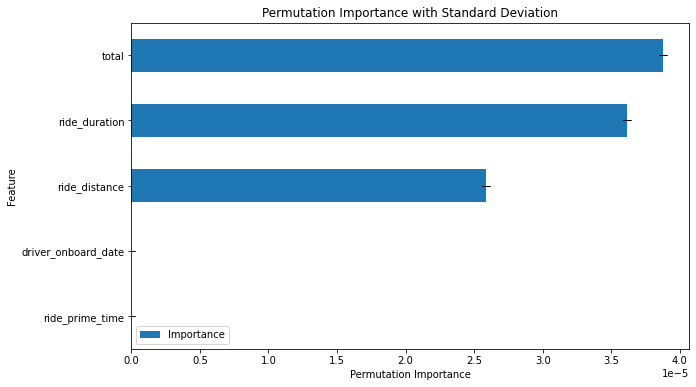

In [17]:
# use permutation importance to find out the feature importance of each variable
result = permutation_importance(reg, x_test, y_test, n_repeats=10, random_state=42)
feature_importance = pd.DataFrame({'Feature': x.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')

In [18]:
feature_importance

,Feature,Importance,Standard Deviation
2,ride_prime_time,0.000000,0.000000
4,driver_onboard_date,0.000000,0.000000
0,ride_distance,0.000026,0.000000
1,ride_duration,0.000036,0.000013
3,total,0.000039,0.000021


In [10]:
#Store results in the dictionaries
result_dict_train["Logistic Train Score"] = np.mean(accuracies)
result_dict_test["Logistic Test Score"] = reg.score(x_test,y_test)

In [11]:
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))

Train Score: 0.989689989873899
Test Score: 0.9896385106328002


In [12]:
#Store results in the dictionaries
result_dict_train["KNN Train Score"] = np.mean(accuracies)
result_dict_test["KNN Test Score"] = knn.score(x_test,y_test)

In [13]:
# this takes too long
# Support vector classifier
tic = time.time()
svc = SVC(random_state=42)
accuracies = cross_val_score(svc, x_train, y_train, cv=2)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(x_test,y_test))
toc = time.time()
print("time taken: {0:.2f}min".format((toc - tic)/60))

## result
# Train Score: 0.9901874019314896
# Test Score: 0.990129454019276
# time taken: 1.04min

Train Score: 0.9901874019314896
Test Score: 0.990129454019276
time taken: 1.03min


In [14]:
# Store results in the dictionaries
result_dict_train["SVM Train Score"] = np.mean(accuracies)
result_dict_test["SVM Test Score"] = svc.score(x_test,y_test)

In [15]:
# Decision tree classifier
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, x_train, y_train, cv=5)
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(x_test,y_test))

Train Score: 0.9811499920254765
Test Score: 0.9809048861786517


In [16]:
#Store results in the dictionaries
result_dict_train["Decision Tree Train Score"] = np.mean(accuracies)
result_dict_test["Decision Tree Test Score"] = dtc.score(x_test,y_test)

In [19]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, x_train, y_train, cv=5)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(x_test,y_test))

Train Score: 0.9895672516904028
Test Score: 0.9897935453864242


In [21]:
#Store results in the dictionaries
result_dict_train["Random Forest Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Test Score"] = rfc.score(x_test,y_test)

In [22]:
gnb = GaussianNB()
accuracies = cross_val_score(gnb, x_train, y_train, cv=5)
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",gnb.score(x_test,y_test))

Train Score: 0.9901809419819398
Test Score: 0.990129454019276


In [24]:
#Store results in the dictionaries
result_dict_train["Gaussian NB Train Score"] = np.mean(accuracies)
result_dict_test["Gaussian NB Test Score"] = gnb.score(x_test,y_test)

In [25]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
df_result_train

,Score
Logistic Train Score,0.990181
KNN Train Score,0.989690
SVM Train Score,0.990187
Decision Tree Train Score,0.981150
Random Forest Train Score,0.989567
Gaussian NB Train Score,0.990181


In [26]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
Logistic Test Score,0.990129
KNN Test Score,0.989639
SVM Test Score,0.990129
Decision Tree Test Score,0.980905
Random Forest Test Score,0.989794
Gaussian NB Test Score,0.990129


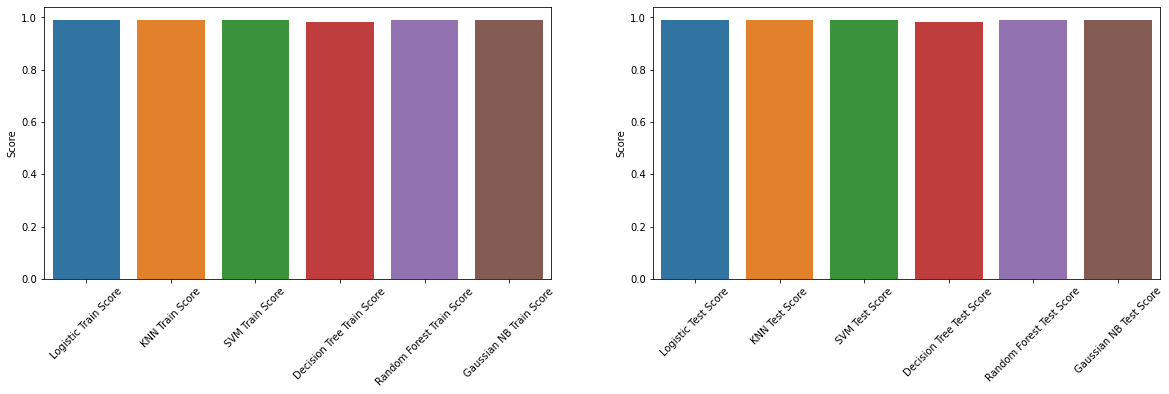

In [36]:
import seaborn as sns

fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 45)
ax[1].set_xticklabels(df_result_test.index,rotation = 45)
plt.show()